# Разделимость данных

Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта
1. Примените алгоритм кластеризации к спроецированным данным. Расчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции
1. Опишите результаты

In [1]:
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn; seaborn.set()
from utils import discretization
from utils import clustering
from utils import dimension_reduction

In [2]:
df = pd.read_csv('./data/raw/user_data.csv')
df.loc[(df.gender == "Male"), 'gender'] = 0
df.loc[(df.gender == "Female"), 'gender'] = 1
df.loc[(df.gender == "Non-Binary"), 'gender'] = 2
df.loc[(df.gender == "Other"), 'gender'] = 3
df.gender = df.gender.astype(str).astype(int)
df.drop(['dropped',
         'Unnamed: 0',
         'on_hold',
         'plan_to_watch',
         'rewatched',
         'watching'], axis = 1, inplace = True)
df.head()

,completed,days_watched,episodes_watched,mean_score,total_entries,gender,age
0,467,181.6,11160,7.74,477,3,23
1,1125,263.3,16195,7.80,2271,0,91
2,887,270.4,16189,7.36,1070,0,29
3,102,17.8,1093,6.81,518,3,23
4,193,65.2,3961,6.92,325,3,23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   completed         2195 non-null   int64  
 1   days_watched      2195 non-null   float64
 2   episodes_watched  2195 non-null   int64  
 3   mean_score        2195 non-null   float64
 4   total_entries     2195 non-null   int64  
 5   gender            2195 non-null   int64  
 6   age               2195 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 120.2 KB


Meaning of the 2 components:
0.063 x 0 + 0.013 x 1 + 0.995 x 0 + -0.000 x 0 + 0.077 x 0 + -0.000 x 0 + 0.000 x 0
0.394 x 0 + 0.023 x 1 + -0.095 x 0 + -0.000 x 0 + 0.914 x 0 + -0.000 x 0 + 0.001 x 0


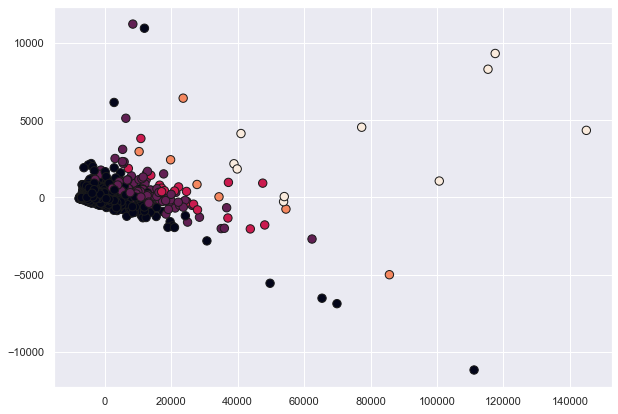

In [4]:
y_target = df.completed.apply(discretization.sample_completed)
temp = dimension_reduction.run_PCA(df, y_target)

Projecting 7-dimensional data to 2D


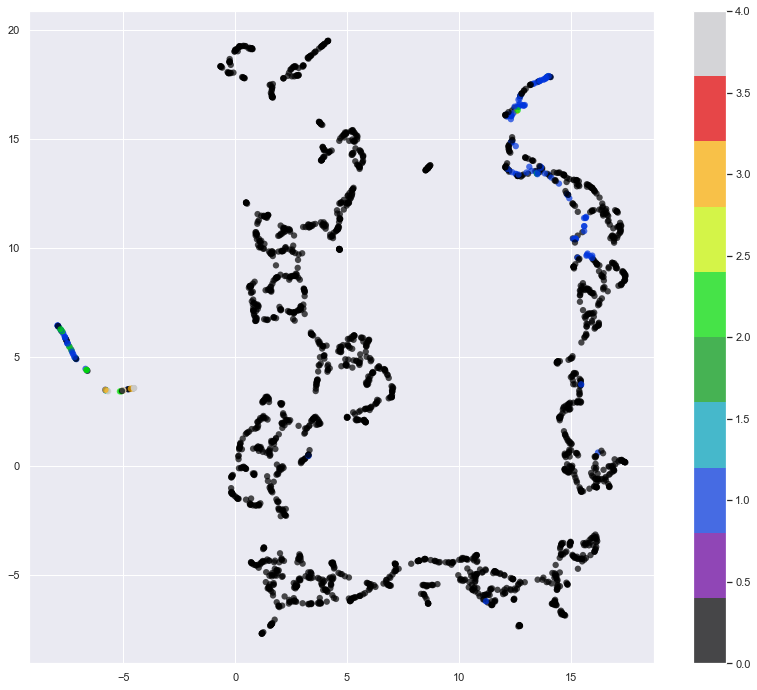

In [5]:
temp = dimension_reduction.run_UMAP(df, y_target, 5, 0.1)

Meaning of the 2 components:
0.063 x 4 + 0.013 x 4 + 0.995 x 4 + -0.000 x 0 + 0.077 x 2 + -0.000 x 4 + 0.000 x 1
0.394 x 4 + 0.023 x 4 + -0.095 x 4 + -0.000 x 0 + 0.914 x 2 + -0.000 x 4 + 0.001 x 1


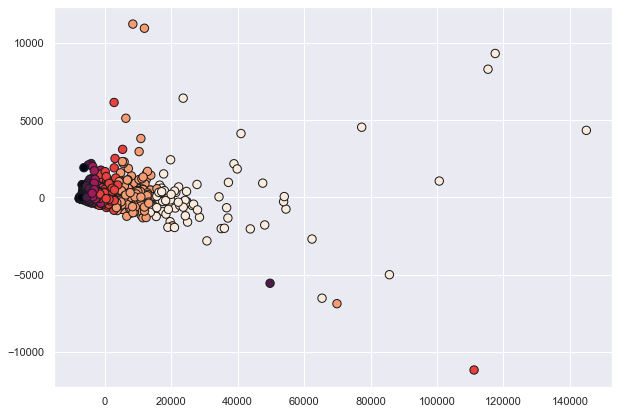

In [6]:
y_target = df.days_watched.apply(discretization.sample_days_watched)
temp = dimension_reduction.run_PCA(df, y_target)

Projecting 7-dimensional data to 2D


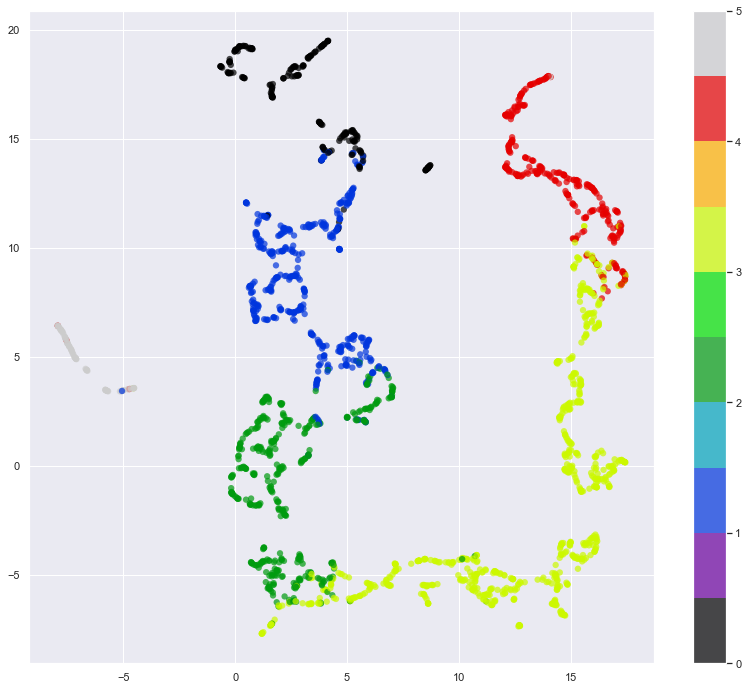

In [7]:
temp = dimension_reduction.run_UMAP(df, y_target, 5, 0.1)

Meaning of the 2 components:
0.063 x 3 + 0.013 x 3 + 0.995 x 3 + -0.000 x 3 + 0.077 x 3 + -0.000 x 2 + 0.000 x 2
0.394 x 3 + 0.023 x 3 + -0.095 x 3 + -0.000 x 3 + 0.914 x 3 + -0.000 x 2 + 0.001 x 2


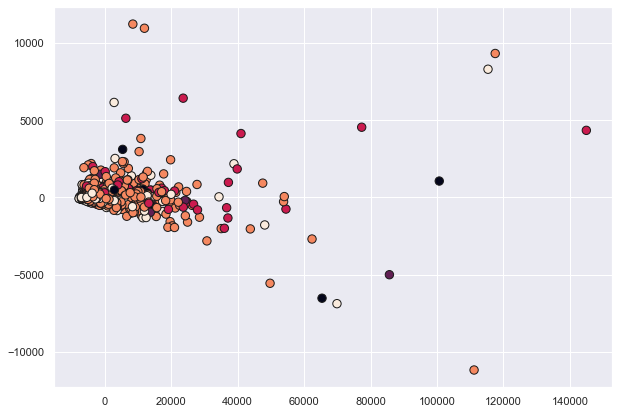

In [8]:
y_target = df.mean_score.apply(discretization.sample_mean_score)
temp = dimension_reduction.run_PCA(df, y_target)

Projecting 7-dimensional data to 2D


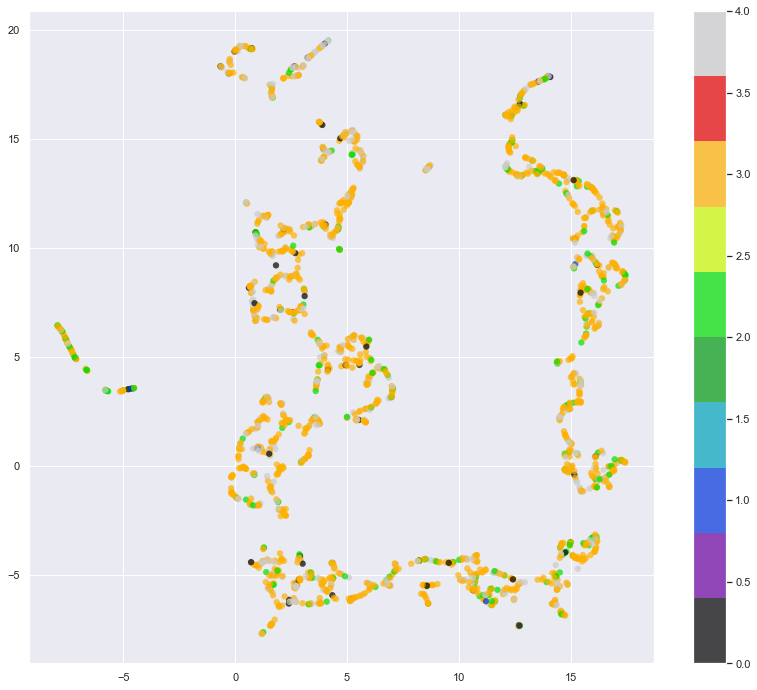

In [9]:
temp = dimension_reduction.run_UMAP(df, y_target, 5, 0.1)

Meaning of the 2 components:
0.063 x 3 + 0.013 x 0 + 0.995 x 0 + -0.000 x 3 + 0.077 x 3 + -0.000 x 0 + 0.000 x 1
0.394 x 3 + 0.023 x 0 + -0.095 x 0 + -0.000 x 3 + 0.914 x 3 + -0.000 x 0 + 0.001 x 1


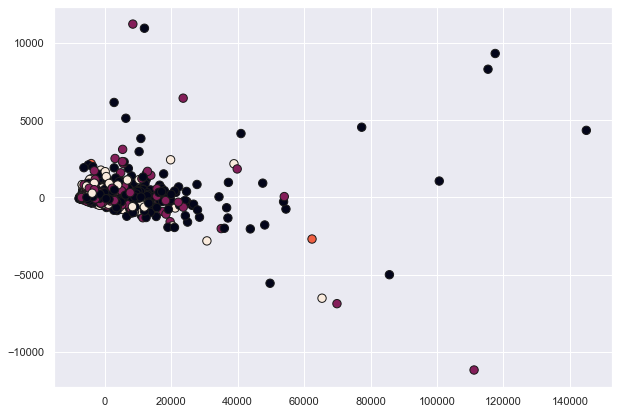

In [10]:
y_target = df.gender
temp = dimension_reduction.run_PCA(df, y_target)

Projecting 7-dimensional data to 2D


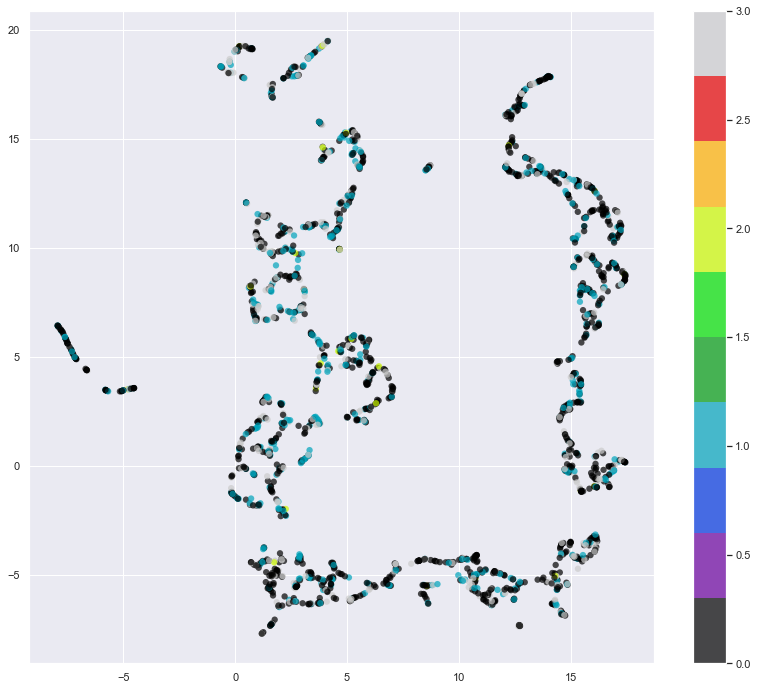

In [11]:
temp = dimension_reduction.run_UMAP(df, y_target, 5, 0.1)

Meaning of the 2 components:
0.063 x 1 + 0.013 x 3 + 0.995 x 2 + -0.000 x 1 + 0.077 x 1 + -0.000 x 1 + 0.000 x 2
0.394 x 1 + 0.023 x 3 + -0.095 x 2 + -0.000 x 1 + 0.914 x 1 + -0.000 x 1 + 0.001 x 2


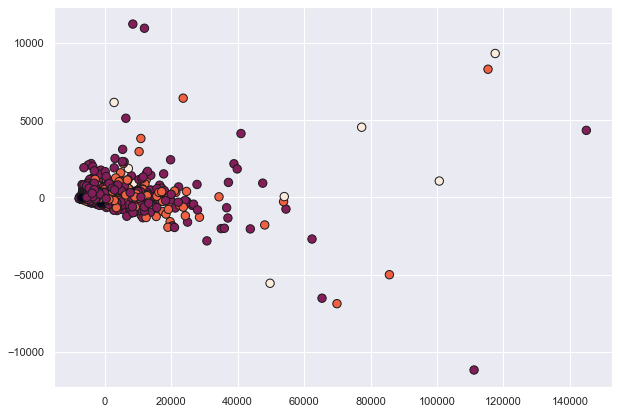

In [12]:
y_target = df.age.apply(discretization.sample_age)
temp = dimension_reduction.run_PCA(df, y_target)

Projecting 7-dimensional data to 2D


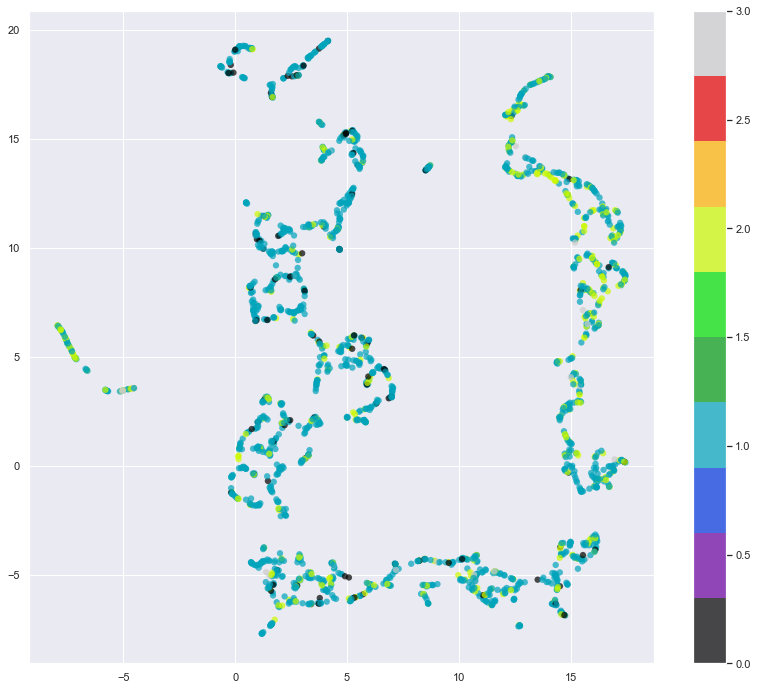

In [13]:
temp = dimension_reduction.run_UMAP(df, y_target, 5, 0.1)

Следующие y_target показали "наилучшие" результаты снижения размерности:
 * `days_watched`

Meaning of the 2 components:
0.063 x 4 + 0.013 x 4 + 0.995 x 4 + -0.000 x 0 + 0.077 x 2 + -0.000 x 4 + 0.000 x 1
0.394 x 4 + 0.023 x 4 + -0.095 x 4 + -0.000 x 0 + 0.914 x 2 + -0.000 x 4 + 0.001 x 1


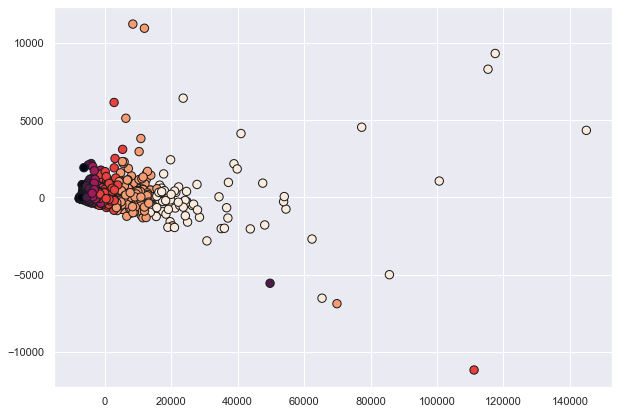

In [24]:
y_target = df.days_watched.apply(discretization.sample_days_watched)
X_reduced = dimension_reduction.run_PCA(df, y_target)

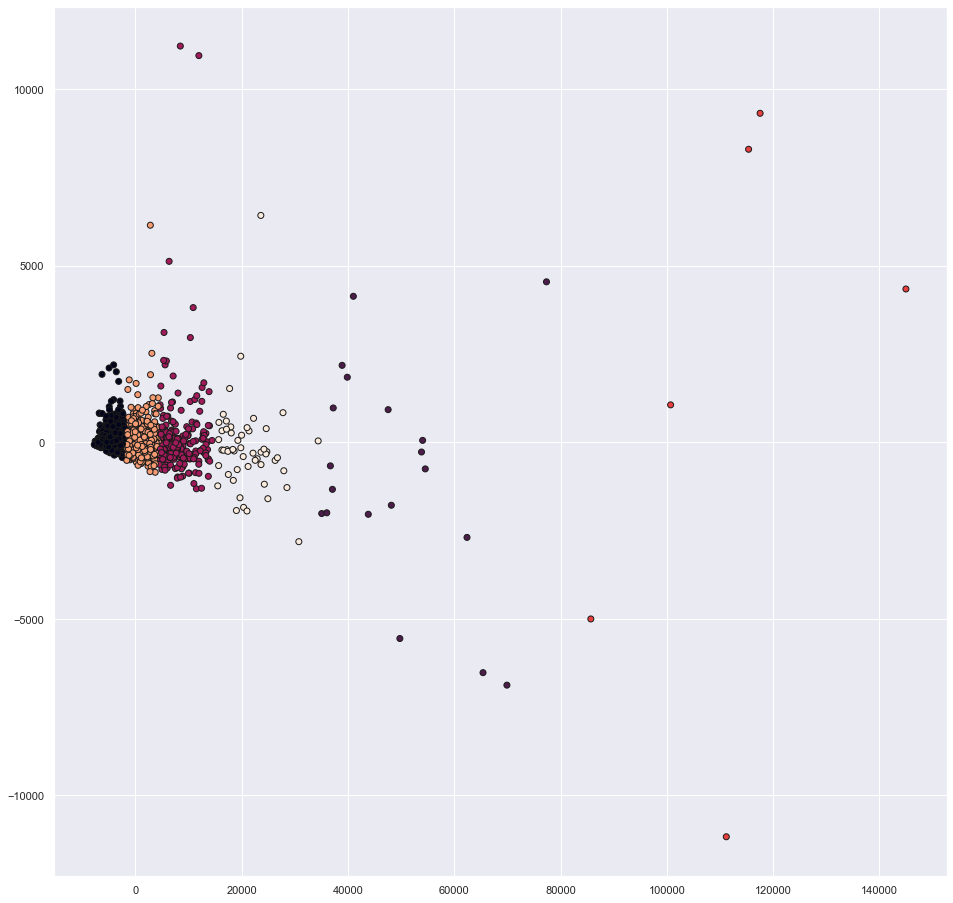

In [25]:
y_pred = clustering.run_KMeans(X_reduced, 6)

In [26]:
clustering.metrica(X_reduced, y_target, y_pred)

0.760522692869142
0.5689376471507366


Projecting 7-dimensional data to 2D


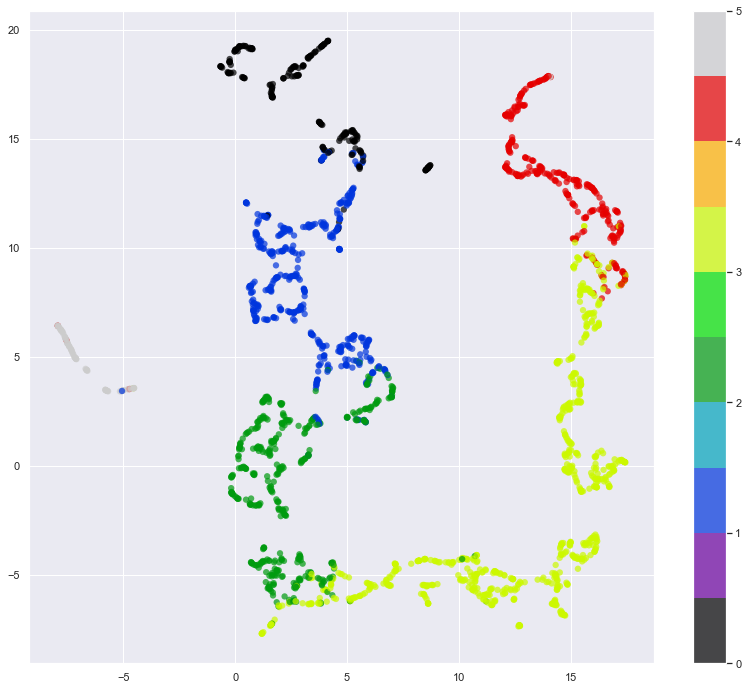

In [16]:
X_reduced = dimension_reduction.run_UMAP(df, y_target, 5, 0.1)

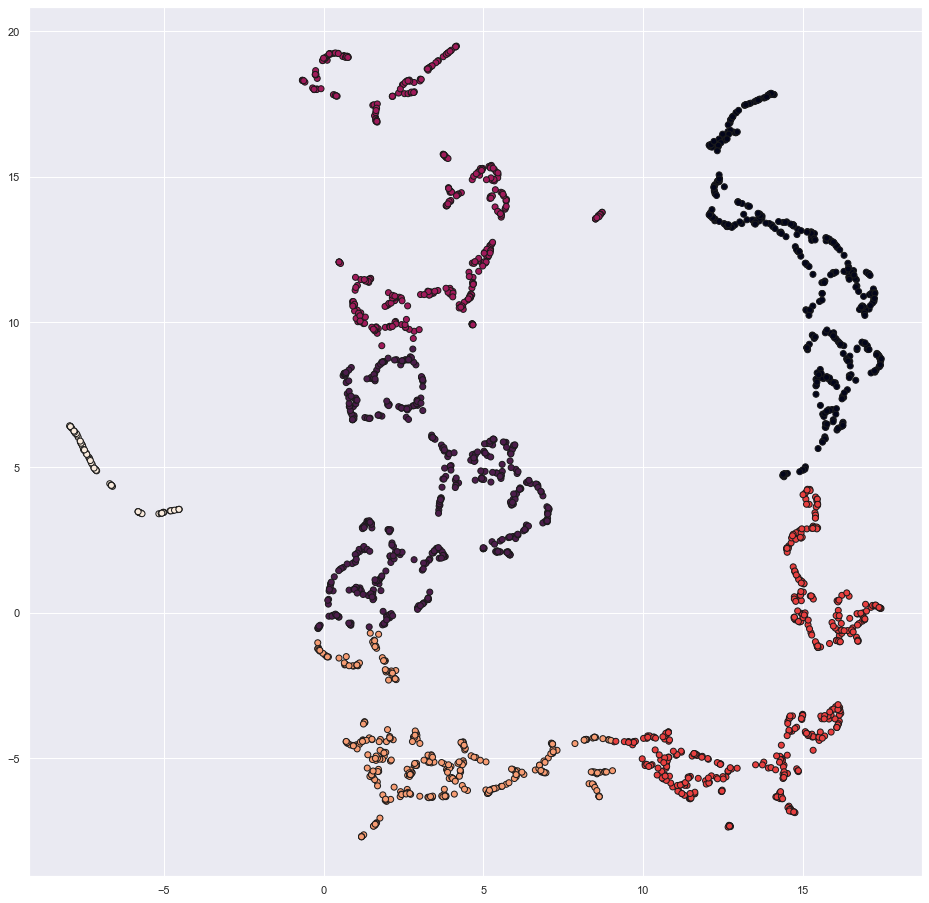

In [17]:
y_pred = clustering.run_KMeans(X_reduced, 6)

In [18]:
clustering.metrica(X_reduced, y_target, y_pred)

0.829217393471115
0.5148822


In [19]:
clustering.distances(X_reduced, y_pred)

3.2610455
14.136327
